In [88]:
import yt
from yt.units import *

In [89]:
ds = yt.load("/Volumes/Elements/foggieforayan/halo_004123/nref11c_nref9f/RD0020/RD0020")

yt : [INFO     ] 2021-06-09 15:45:35,901 Parameters: current_time              = 154.80100926529
yt : [INFO     ] 2021-06-09 15:45:35,902 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-06-09 15:45:35,904 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-06-09 15:45:35,905 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-06-09 15:45:35,906 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-06-09 15:45:35,907 Parameters: current_redshift          = 2
yt : [INFO     ] 2021-06-09 15:45:35,908 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2021-06-09 15:45:35,908 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2021-06-09 15:45:35,909 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-06-09 15:45:35,909 Parameters: hubble_constant           = 0.695


In [90]:
def my_young_stars(pfilter, data):
    '''
    Filter star particles with creation time < threshold Myr ago
    To use: yt.add_particle_filter("young_stars8", function=_young_stars8, filtered_type='all', requires=["creation_time"])
    Based on: foggie.yt_fields._young_stars8()
    '''
    isstar = data[(pfilter.filtered_type, "particle_type")] == 2
    age = data.ds.current_time - data[pfilter.filtered_type, "creation_time"]
    filter = np.logical_and(isstar, age.in_units('Myr') <= 10., age >= 0)
    return filter

yt.add_particle_filter('my_young_stars', function=my_young_stars, filtered_type='all', requires=['creation_time', 'particle_type'])
ds.add_particle_filter('my_young_stars')

yt : [WARNING  ] 2021-06-09 15:45:38,741 The my_young_stars particle filter already exists. Overriding.
Parsing Hierarchy : 100%|█████████▉| 10743/10744 [00:02<00:00, 4211.61it/s]
yt : [INFO     ] 2021-06-09 15:45:42,749 Gathering a field list (this may take a moment.)


True

In [91]:
center = YTArray([23293.48374328, 22958.66858759, 23271.98604886], 'kpc')
x_width = 4 * kpc
small_box = ds.r[center[0] - x_width / 2.: center[0] + x_width / 2., center[1] - x_width / 2.: center[1] + x_width / 2., center[2] - x_width / 2.: center[2] + x_width / 2.]

yt : [INFO     ] 2021-06-09 15:56:45,126 xlim = 22956.668588 22960.668588
yt : [INFO     ] 2021-06-09 15:56:45,127 ylim = 23269.986049 23273.986049
yt : [INFO     ] 2021-06-09 15:56:45,129 xlim = 22956.668588 22960.668588
yt : [INFO     ] 2021-06-09 15:56:45,129 ylim = 23269.986049 23273.986049
yt : [INFO     ] 2021-06-09 15:56:45,131 Splatting (('my_young_stars', 'age')) onto a 800 by 800 mesh



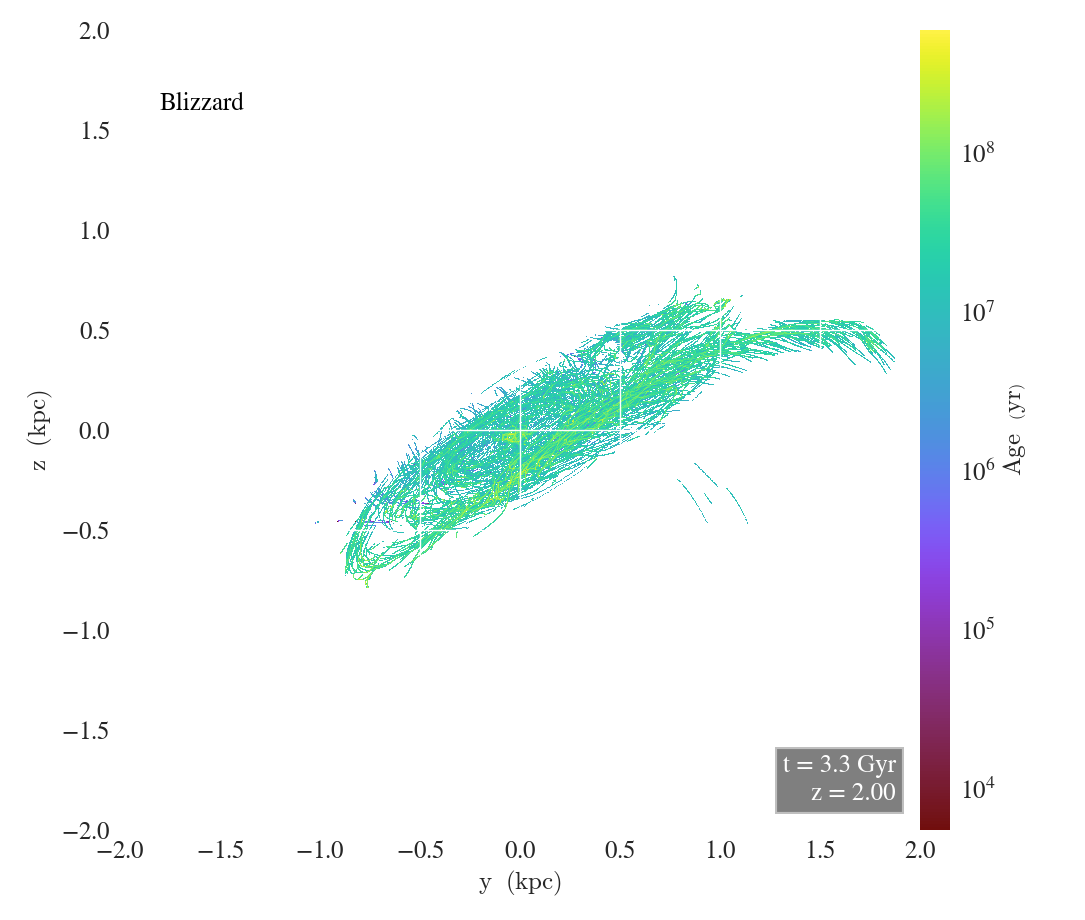

In [96]:
proj = yt.ParticleProjectionPlot(ds, 'x', ('my_young_stars', 'age'), center=center, data_source=small_box, width=x_width)
proj.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)
proj.annotate_text((0.05, 0.9), 'Blizzard', coord_system='axis', text_args = {'fontsize': 500, 'color': 'black'})


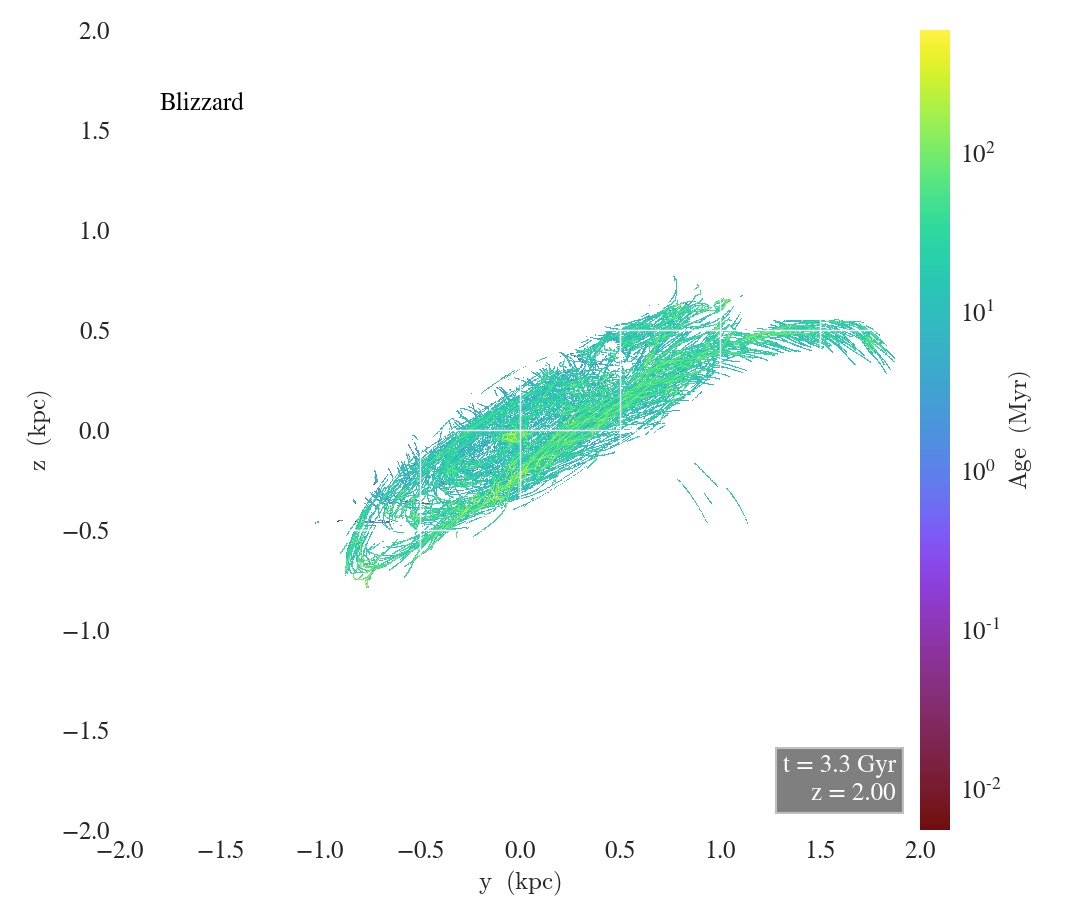

In [97]:
proj.set_unit(('my_young_stars', 'age'), 'Myr')

yt : [INFO     ] 2021-06-09 15:57:18,694 Splatting (('my_young_stars', 'age')) onto a 67 by 67 mesh



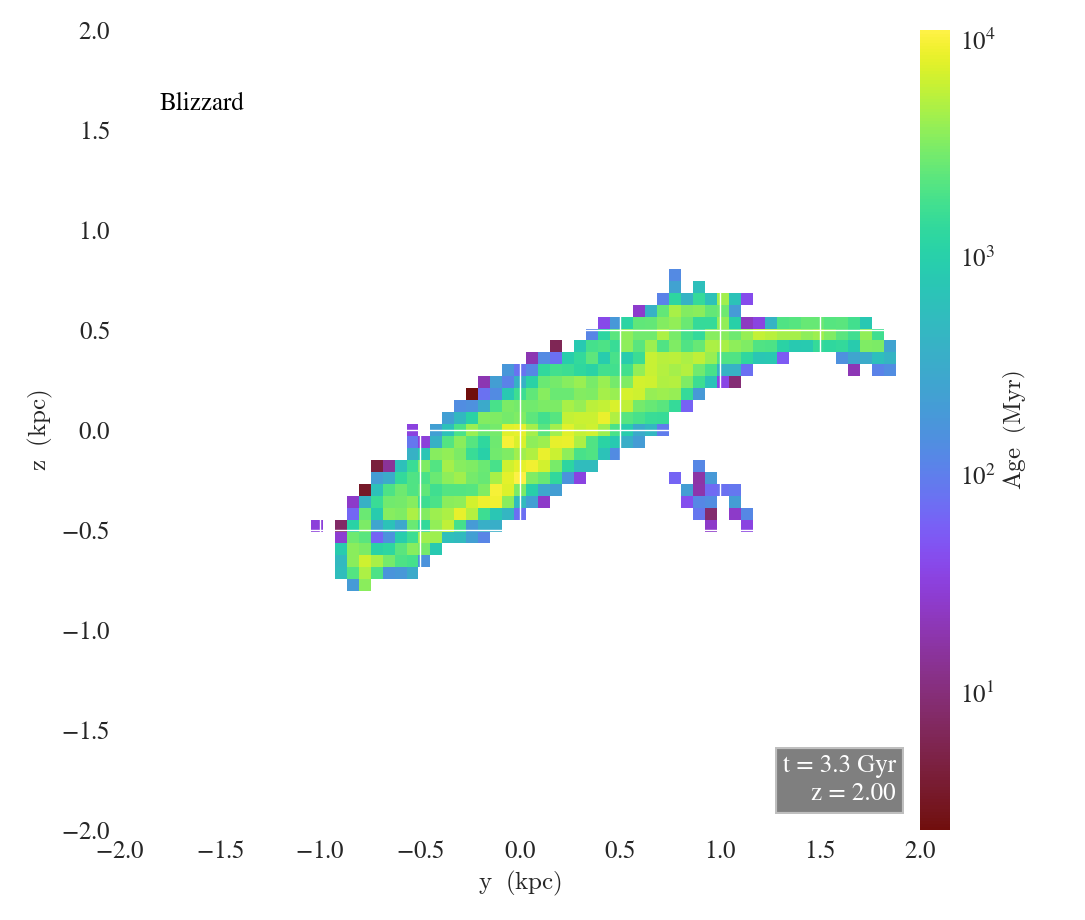

In [98]:
proj.set_buff_size((67, 67))


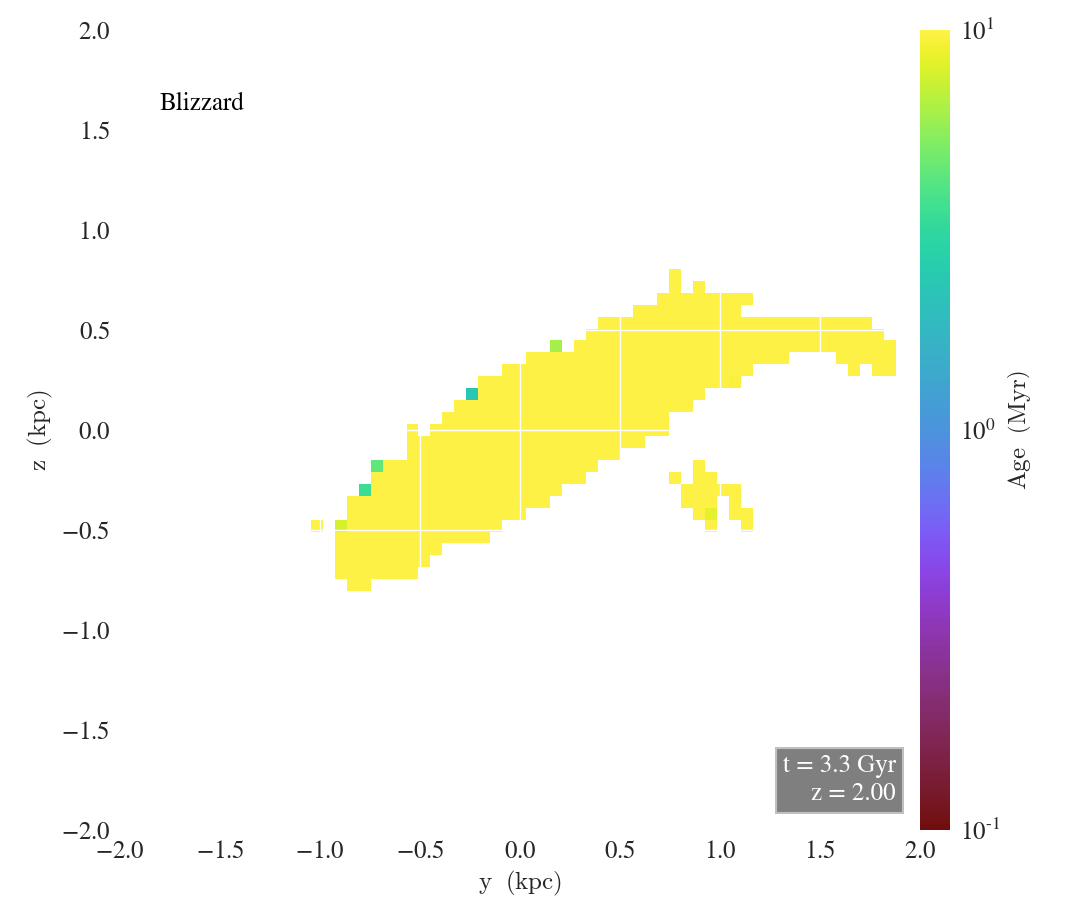

In [99]:
proj.set_zlim(('my_young_stars', 'age'), zmin=0.1, zmax=10)

In [100]:
proj.save(name='/Users/acharyya/Work/astro/foggie_outputs/plots_halo_004123/nref11c_nref9f/figs/RD0020/ys_age_box=%.2Fkpc' % (x_width), suffix='png', mpl_kwargs={'dpi': 500})

yt : [INFO     ] 2021-06-09 15:57:35,826 Saving plot /Users/acharyya/Work/astro/foggie_outputs/plots_halo_004123/nref11c_nref9f/figs/RD0020/ys_age_box=4.00kpc_Particle_x_age.png


['/Users/acharyya/Work/astro/foggie_outputs/plots_halo_004123/nref11c_nref9f/figs/RD0020/ys_age_box=4.00kpc_Particle_x_age.png']

In [102]:
ad = ds.all_data()
sba = small_box['my_young_stars', 'age']
a = ad['my_young_stars', 'age']

In [105]:
sba.shape, a.shape

((194254,), (323443,))